## Convolution and filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt

"A central characteristic of any linear system is that its response to a sine wave input $Asin(\omega t + f)$ is also a sine wave in which the amplitude A or the phase f may be altered"--Signal Processing for Neuroscientists, Wim

Let's take a look of it:

If $x(t) = sin(\omega_0 t) = \frac{e^{i\omega_0 t}-e^{-i\omega_0 t}}{2i}$ and $h(t) = e^{-t/t_0}, t>0$,

the Fourier transformation would be

$X(\omega) = \int_{-\infty}^{\infty}x(t)e^{-i\omega t}dt = \int_{-\infty}^{\infty}\frac{e^{i(\omega_0-\omega )t}-e^{-i(\omega_0+\omega)t}}{2i}dt = \frac{\delta_{\omega , \omega_0}-\delta_{\omega , -\omega_0}}{2i}$

$H(\omega) = \int_{-\infty}^{\infty}h(t)e^{-i\omega t}dt = \int_{0}^{\infty}e^{-(\frac{1}{t_0}+i\omega )t}dt = \frac{t_0(1-i\omega t_0)}{1+(\omega t_0)^2} ...$It's a complex function and you can figure out the absolute value and phase. Let me skip it here and just write it as $g(\omega)e^{i\phi (\omega)}$

Then we can get the filtered signal in frequency domain, 

$Y(\omega) = X(\omega)H(\omega) = \frac{\delta_{\omega , \omega_0}-\delta_{\omega , -\omega_0}}{2i}g(\omega)e^{i \phi(\omega)}$

Finally, we can do the inverse Fourier transform and get the filtered signal in the time domain:

$y(t) = \int_{-\infty}^{\infty}Y(\omega)e^{i\omega t}d\omega = \frac{g(\omega_0)e^{i(\omega_0 t+\phi(\omega_0))}-g(-\omega_0)e^{i(-\omega_0 t +\phi(-\omega_0))}}{2i} = g(\omega_0)sin(\omega_0 t + \phi(\omega_0))$, assume $g(\omega) = g(-\omega), \phi(\omega) = \phi(-\omega)$ 

So you get the original sine wave is amplified by $g(\omega_0)$,$|H(\omega_0)|$ and phase shift by $\phi(\omega_0)$, $tan^{-1}(Im(H(\omega_0))/Re(H(\omega_0)))$

Both the gain and phase shift depend on the signal frequency. You can play it with the following program: 

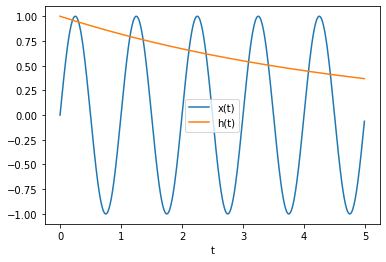

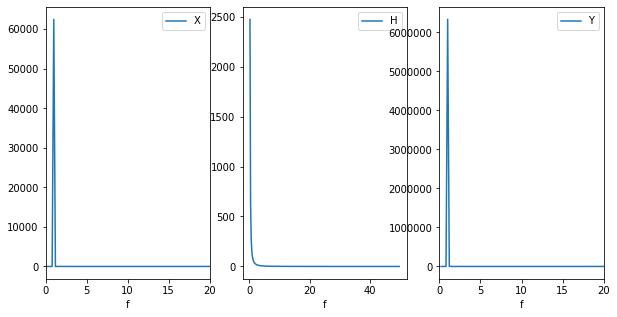

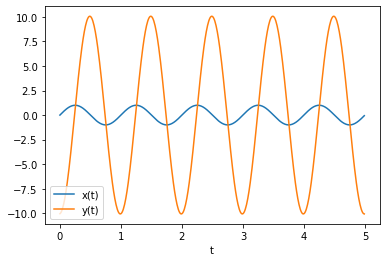

In [2]:
# Demo gain and phase shift

Fs = 100
tau = 5

# signal and kernel
t = np.arange(0,5,1/Fs)
x = np.sin(2*np.pi*t)
h = np.exp(-t/tau)
plt.plot(t,x, label = "x(t)")
plt.plot(t,h, label = "h(t)")
plt.xlabel('t')
plt.legend()
plt.show()

# fft
f = np.fft.fftfreq(len(t),1/Fs) 
X = np.fft.fft(x)
H = np.fft.fft(h)
Y = X * H
fig= plt.figure(figsize=(10,5))
plt.subplot(131)
plt.plot(f[f>0],np.abs(X[f>0])**2, label = "X")
plt.xlim(0,20)
plt.xlabel('f')
plt.legend()
plt.subplot(132)
plt.plot(f[f>0],np.abs(H[f>0])**2, label = "H")
plt.xlabel('f')
plt.legend()
plt.subplot(133)
plt.plot(f[f>0],np.abs(Y[f>0])**2, label = "Y")
plt.xlim(0,20)
plt.legend()
plt.xlabel('f')
plt.show()

# ifft
y = np.fft.ifft(Y).real
plt.plot(t,x, label = "x(t)")
plt.plot(t,y, label = "y(t)") 
plt.xlabel('t')
plt.legend()
plt.show()

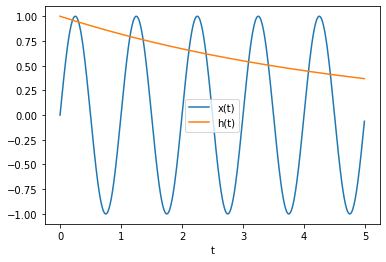

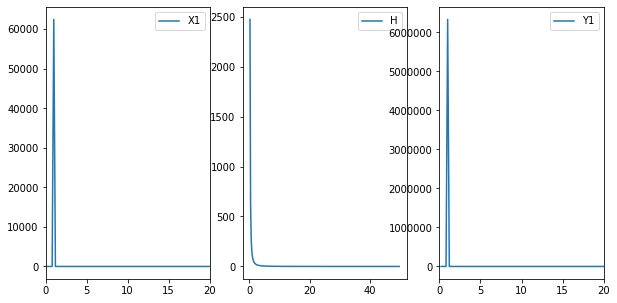

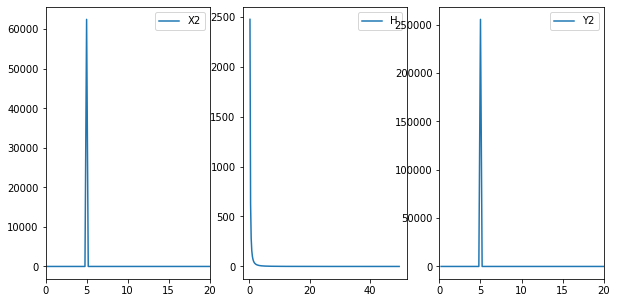

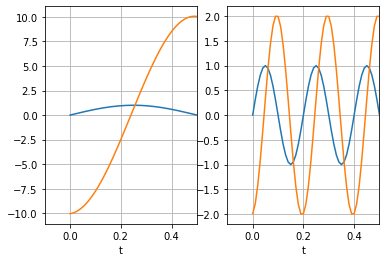

In [3]:
# Demo gain and phase shift depends on signal frequency

Fs = 100
tau = 5

t = np.arange(0,5,1/Fs)
x1 = np.sin(2*np.pi*t)
x2 = np.sin(2*np.pi*t*5)
h = np.exp(-t/tau)

plt.plot(t,x, label = "x(t)")
plt.plot(t,h, label = "h(t)")
plt.xlabel('t')
plt.legend()
plt.show()

f = np.fft.fftfreq(len(t),1/Fs) 
X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)
H = np.fft.fft(h)
Y1 = X1 * H
Y2 = X2 * H
fig= plt.figure(figsize=(10,5))
plt.subplot(131)
plt.plot(f[f>0],np.abs(X1[f>0])**2, label = "X1")
plt.xlim(0,20)
plt.legend()
plt.subplot(132)
plt.plot(f[f>0],np.abs(H[f>0])**2, label = "H")
plt.legend()
plt.subplot(133)
plt.plot(f[f>0],np.abs(Y1[f>0])**2, label = "Y1")
plt.xlim(0,20)
plt.legend()
plt.show()

fig= plt.figure(figsize=(10,5))
plt.subplot(131)
plt.plot(f[f>0],np.abs(X2[f>0])**2, label = "X2")
plt.xlim(0,20)
plt.legend()
plt.subplot(132)
plt.plot(f[f>0],np.abs(H[f>0])**2, label = "H")
plt.legend()
plt.subplot(133)
plt.plot(f[f>0],np.abs(Y2[f>0])**2, label = "Y2")
plt.xlim(0,20)
plt.legend()
plt.show()

y1 = np.fft.ifft(Y1).real
y2 = np.fft.ifft(Y2).real
plt.subplot(121)
plt.plot(t,x1,t,y1)
plt.xlim(-0.1,0.5)
plt.xlabel('t')
plt.grid()
plt.subplot(122)
plt.plot(t,x2,t,y2)
plt.xlim(-0.1,0.5)
plt.xlabel('t')
plt.grid()

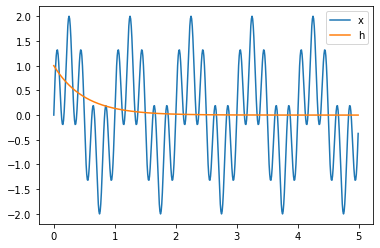

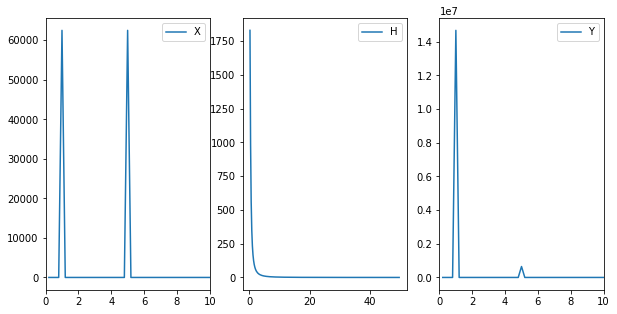

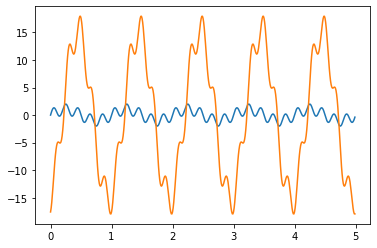

In [4]:
# Low pass filter

Fs = 100
tau = 0.5

t = np.arange(0,5,1/Fs)
x = np.sin(2*np.pi*t)+np.sin(2*np.pi*t*5)
h = np.exp(-t/tau)

plt.plot(t,x, label = "x")
plt.plot(t,h, label = "h")
plt.legend()
plt.show()

f = np.fft.fftfreq(len(t),1/Fs) 
X = np.fft.fft(x)
H = np.fft.fft(h)
Y = X * H
fig= plt.figure(figsize=(10,5))
plt.subplot(131)
plt.plot(f[f>0],np.abs(X[f>0])**2, label = "X")
plt.xlim(0,10)
plt.legend()
plt.subplot(132)
plt.plot(f[f>0],np.abs(H[f>0])**2, label = "H")
plt.legend()
plt.subplot(133)
plt.plot(f[f>0],np.abs(Y[f>0])**2, label = "Y")
plt.xlim(0,10)
plt.legend()
plt.show()

y = np.fft.ifft(Y).real

plt.plot(t,x,t,y)
plt.show()

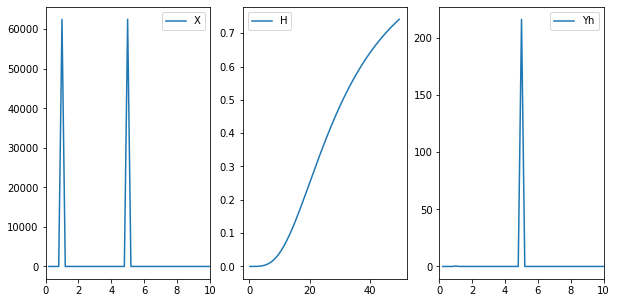

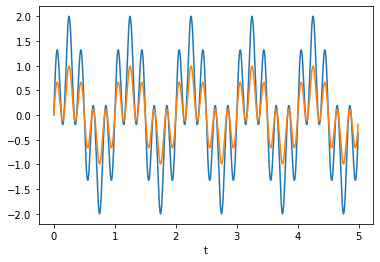

In [6]:
# high pass filter

x = np.sin(2*np.pi*t)+np.sin(2*np.pi*t*5)
X = np.fft.fft(x)
tau = 1
w = np.arange(0,5,1/Fs)
g = (w*tau)**2/(1+(w*tau)**2)

Yh = X * g

fig= plt.figure(figsize=(10,5))
plt.subplot(131)
plt.plot(f[f>0],np.abs(X[f>0])**2, label = "X")
plt.xlim(0,10)
plt.legend()
plt.subplot(132)
plt.plot(f[f>0],np.abs(g[f>0])**2, label = "H")
plt.legend()
plt.subplot(133)
plt.plot(f[f>0],np.abs(Yh[f>0])**2, label = "Yh")
plt.xlim(0,10)
plt.legend()
plt.show()

yh = np.fft.ifft(Yh).real
plt.plot(t,x,t,yh)
plt.xlabel('t')
plt.show()